In [1]:
import matplotlib
import numpy as np
import pandas as pd
import statsmodels as sm

In [2]:
kickstarter = pd.read_csv(r'C://Users/Tom/Documents/Kickstarter/storytelling_master.csv', index_col=0)

In [3]:
# Shrink the dataset only to include possible relevant columns in statistical model.
kickstarter = kickstarter[['new_state', 'goal', 'converted_USD', 'backers_count', 'blurb', 'category.name',
                           'category.slug', 'location.country', 'location.type', 'spotlight', 
                           'staff_pick', 'new_date']]

In [9]:
# Adding blurb length to model
def word_count(string):
    tokens = string.split()
    n_tokens = len(tokens)
    return(n_tokens)

kickstarter['blurb_length'] = kickstarter['blurb'].apply(lambda x: word_count(x))

In [10]:
# Further cleaning so I can do . notation for the columns.
kickstarter['category_name'] = kickstarter['category.name']
kickstarter['category_slug'] = kickstarter['category.slug']
kickstarter['location_country'] = kickstarter['location.country']
kickstarter['location_type'] = kickstarter['location.type']
kickstarter['usd_raised'] = kickstarter['converted_USD']
kickstarter = kickstarter.drop(['category.name', 'category.slug', 'location.country', 'location.type', 'converted_USD'], axis=1)

In [11]:
'''
Statistical tests and their null hypothesis

1.) There is no difference between the converted_USD amount and the number of backers a project has.
2.) Having the spotlight does not make a difference in the proportion of Kickstarter projects approved.
3.) Having the staff pick does not make a difference in the proportion of Kickstarter projects approved.
4.) It does not matter what category a project is in terms of approval.
5.) It does not matter when a project started.
6.) It does not matter where a project is from.
'''

'\nStatistical tests and their null hypothesis\n\n1.) There is no difference between the converted_USD amount and the number of backers a project has.\n2.) Having the spotlight does not make a difference in the proportion of Kickstarter projects approved.\n3.) Having the staff pick does not make a difference in the proportion of Kickstarter projects approved.\n4.) It does not matter what category a project is in terms of approval.\n5.) It does not matter when a project started.\n6.) It does not matter where a project is from.\n'

In [12]:
staff_pick = pd.crosstab(kickstarter['new_state'], kickstarter['staff_pick'])

In [13]:
spotlight = pd.crosstab(kickstarter['new_state'], kickstarter['spotlight'])

In [14]:
new_date = pd.crosstab(kickstarter['new_state'], kickstarter['new_date'])

In [15]:
category = pd.crosstab(kickstarter['new_state'], kickstarter['category_name'])

In [16]:
slug = pd.crosstab(kickstarter['new_state'], kickstarter['category_slug']).transpose()

In [12]:
top15countries = pd.crosstab(kickstarter['new_state'], kickstarter['location_country']).transpose().sort_values('failed', ascending=False)[0:15]

In [13]:
location = pd.crosstab(kickstarter['new_state'], kickstarter['location_type']).transpose().sort_values('failed', ascending=False)

In [17]:
# Correlations between goal, amount raised, number of backers, and blurb length.
# Stolen from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

import matplotlib.pyplot as plt

df = kickstarter[['goal', 'usd_raised', 'backers_count', 'blurb_length']]

corr = df.corr()
corr.style.background_gradient(cmap='Greens', axis=None).set_precision(2)

,goal,usd_raised,backers_count,blurb_length
goal,1,0.11,0.008,-0.005
usd_raised,0.11,1,0.44,-0.011
backers_count,0.008,0.44,1,-0.0099
blurb_length,-0.005,-0.011,-0.0099,1


In [35]:
import numpy as np
log_goal = kickstarter.goal.apply(lambda x: np.log1p(x))
log_usd_raised = kickstarter.usd_raised.apply(lambda x: np.log1p(x))
log_backers = kickstarter.backers_count.apply(lambda x: np.log1p(x))
log_df = pd.DataFrame([log_goal, log_usd_raised, log_backers]).transpose()

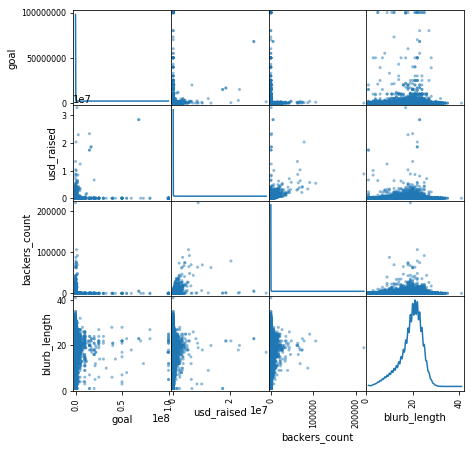

In [18]:
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=[7, 7], diagonal='kde')
plt.show()
#plt.savefig('kickstarter_correlation_plots.png')

In [36]:
print(log_df.head())

       goal  usd_raised  backers_count
0  7.601402    3.258097       0.693147
1  2.397895    1.945910       1.098612
2  6.803505    0.000000       0.000000
3  6.803505    0.000000       0.000000
4  9.615872    0.693147       0.693147


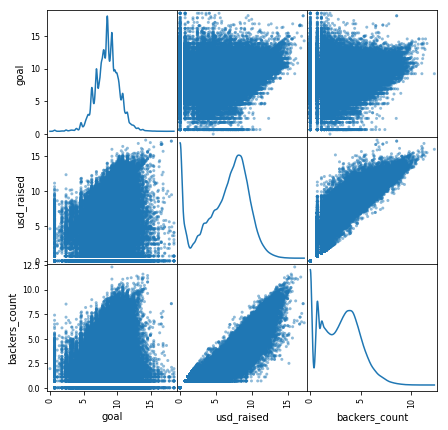

In [37]:
scatter_matrix = pd.plotting.scatter_matrix(log_df, figsize=[7, 7], diagonal='kde')
plt.show()
#plt.savefig('kickstarter_correlation_plots.png')

In [38]:
corr = log_df.corr()
corr.style.background_gradient(cmap='Greens', axis=None).set_precision(2)

,goal,usd_raised,backers_count
goal,1,0.13,0.11
usd_raised,0.13,1,0.93
backers_count,0.11,0.93,1


In [19]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2


def chi2test(table):
    '''
    Performs a chi-squared test on a table of values.
    '''
    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d' % dof)
    print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' %
         (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
        # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return p

In [20]:
chi2test(staff_pick)

dof=1
[[145290.18867088  18436.81132912]
 [108932.81132912  13823.18867088]]
probability=0.950, critical=3.841, stat=20262.069
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


0.0

In [18]:
chi2test(spotlight)

dof=1
[[92385.22706059 71341.77293941]
 [69266.77293941 53489.22706059]]
probability=0.950, critical=3.841, stat=231664.932
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


0.0

In [19]:
chi2test(new_date)

dof=114
[[   6.85808233   27.43232932   30.86137048   28.00383618   45.72054886
   138.30466031   77.72493307   88.58356342   80.58246737  116.5873996
   140.01918089  198.88438756  252.03452561  277.75233434  388.62466534
   371.47945951  364.04987032  384.05261045  453.20494061  491.49590028
   457.20548863  587.50905289  632.08658803  545.78905206  734.95782298
   778.96385126  787.53645417  819.54083837  802.96713941  749.2454945
   834.40001675  913.8394704   790.39398847 1006.99508871 1238.45536733
  1495.63345469 1395.61975405 1442.48331664 1408.19290499 1315.60879354
  1235.02632617 1067.0033091  1209.30851743 1067.57481596  776.67782382
  1110.43783052 1156.15837938 1312.17975238 1406.47838441 1439.62578233
  1248.17098397 1281.88988875 1180.16166753 1238.45536733 1349.89920519
  1395.04824719  973.27618393 1132.72659809 1239.59838106 1360.18632868
  1501.3485233  1808.8192144  2015.70469801 4018.83624508 2867.82142745
  2538.06196877 2762.0926582  2414.04497998 1659.65592374 

0.0

In [20]:
chi2test(category)

dof=158
[[ 474.92220132  661.23343794 2448.33539163  522.92877762  165.16548277
  1659.65592374  644.65973897 4030.83788916 3949.11240807  536.64494228
   937.2712517  1733.38030878  284.03890981  129.7320574   195.45534639
   228.03123746  311.47123913  314.9002803   212.02904535 3324.45540922
   352.61973311   24.00328815  197.74137383 1637.93866303 1690.51729422
  2135.72113878 1361.3293424   196.02685325  656.66138305  380.62356929
  2604.35676462  194.31233267  922.41207332  110.87233099  809.25371488
   654.37535561  906.40988121  362.33534974  970.41864962 3902.82035234
  1581.35948381 1722.52167842 1412.76495988   80.01096051  573.22138137
   666.94850654  182.31068859  758.96111113  233.1747992   254.89205991
   288.6109647   792.10850906 1159.01591368  597.79617639 4344.02364887
   432.63069362  528.64384623  283.46740295 1622.50797779 1232.74029873
   725.24220634 1957.98250507  242.31890898  318.32932146   98.87068692
  1336.18304053 1499.63400272 2283.74141572 2415.7595005

0.0

In [21]:
chi2test(slug)

dof=14
[[13789.31753717 10338.68246283]
 [ 5969.38916096  4475.61083904]
 [ 3820.52336439  2864.47663561]
 [ 1929.97866889  1447.02133111]
 [ 8189.69331514  6140.30668486]
 [10566.59034917  7922.40965083]
 [24089.01418234 18060.98581766]
 [10707.18103692  8027.81896308]
 [14875.75207953 11153.24792047]
 [ 2944.4033468   2207.5966532 ]
 [22005.3001679  16498.6998321 ]
 [ 4553.19515992  3413.80484008]
 [18579.11653746 13929.88346254]
 [17274.93788113 12952.06211887]
 [ 4432.6072123   3323.3927877 ]]
probability=0.950, critical=23.685, stat=17107.872
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


0.0

In [22]:
chi2test(top15countries)

dof=14
[[119654.82197017  89658.17802983]
 [ 14970.50100928  11217.49899072]
 [  6656.92241687   4988.07758313]
 [  3437.36148498   2575.63851502]
 [  2081.96749182   1560.03250818]
 [  1637.7915607    1227.2084393 ]
 [  1251.92443907    938.07556093]
 [  1720.68153497   1289.31846503]
 [  1296.51352868    971.48647132]
 [   916.93461199    687.06538801]
 [  1220.48341434    914.51658566]
 [   588.80464486    441.19535514]
 [   656.83158926    492.16841074]
 [   459.03896099    343.96103901]
 [   342.42134201    256.57865799]]
probability=0.950, critical=23.685, stat=8651.873
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


0.0

In [23]:
chi2test(location)

dof=9
[[1.51681350e+05 1.13724650e+05]
 [5.99796450e+03 4.49703550e+03]
 [3.95025542e+03 2.96174458e+03]
 [8.82406593e+02 6.61593407e+02]
 [3.64049870e+02 2.72950130e+02]
 [6.04654259e+02 4.53345741e+02]
 [2.19458635e+02 1.64541365e+02]
 [1.25731509e+01 9.42684906e+00]
 [1.08586304e+01 8.14136964e+00]
 [3.42904116e+00 2.57095884e+00]]
probability=0.950, critical=16.919, stat=1111.522
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


1.5143034220004437e-233

In [24]:
# Onehotencoding categorical variables
# Standarize quantitative variables
# Test for skewness (log, Box-Cox Transform)

# Logistic Regression
# Decison tree (baseline, max depth of 9)
# Random forest
# Support Vector Machines
# XGBoost
# Light GBM


In [25]:
kickstarter.to_csv('kickstarter_modeling.csv')

array([1.0e-02, 2.0e+03, 5.0e+03, 1.5e+04, 1.0e+08])